In [1]:
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
compas = pd.read_csv("..\\data\\cox-violent-parsed.csv")

In [ ]:
compas.head()

In [ ]:
compas["sex"].replace({'Male': 1, 'Female': 0}, inplace=True)

In [ ]:
compas.info()

In [ ]:
compas = compas.drop(['last','first','out_custody','in_custody','c_offense_date','decile_score.1','priors_count.1','c_case_number','days_b_screening_arrest','start','end','event','screening_date','c_case_number','juv_other_count','juv_misd_count','juv_fel_count','r_days_from_arrest','id','r_charge_degree','r_offense_date', 'vr_case_number','r_case_number','r_jail_out','c_arrest_date','r_charge_desc','r_jail_in', 'violent_recid','vr_charge_degree','vr_offense_date','vr_charge_desc'], axis=1)

In [ ]:
compas['c_jail_in'] = pd.to_datetime(compas['c_jail_in'])
compas['c_jail_out'] = pd.to_datetime(compas['c_jail_out'])
compas['days_in_jail'] = abs((compas['c_jail_out'] - compas['c_jail_in']).dt.days)

In [ ]:
compas.head()

In [ ]:
compas.info()

In [ ]:
#fill numeric columns with mean
for col in compas.columns:
    if compas[col].dtype == "object":
        compas[col] = compas[col].fillna("UNKNOWN")
    else:
        compas[col] = compas[col].fillna(compas[col].mean())
# compas.info()

**EDA**

After making the appropriate corrections and keeping the columns that interest us the most, we are going to make an exploratory analysis of the data

In [3]:
#print data types
compas.dtypes

NameError: name 'compas' is not defined

In [4]:
compas.describe().T

NameError: name 'compas' is not defined

In [98]:
compas.describe(include=["object","category"]).T

,count,unique,top,freq
name,18316,10855,brandon ross,13
compas_screening_date,18316,703,20/03/2013,72
dob,18316,7485,21/11/1991,21
age_cat,18316,3,25 - 45,10372
race,18316,6,African-American,9791
c_charge_degree,18316,15,(F3),10294
c_charge_desc,18316,514,arrest case no charge,3085
type_of_assessment,18316,1,Risk of Recidivism,18316
score_text,18316,4,Low,8597
v_type_of_assessment,18316,1,Risk of Violence,18316


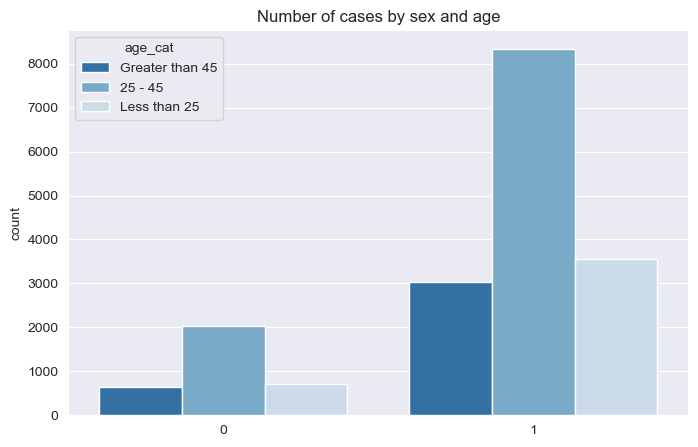

In [99]:
plt.figure(figsize=(8,5))
sns.countplot(data=compas,x="sex",hue="age_cat",palette="Blues_r")
plt.title("Number of cases by sex and age")
plt.xlabel("")
# so only the graphic appears without any text referring to the object type.
plt.show(block=False)

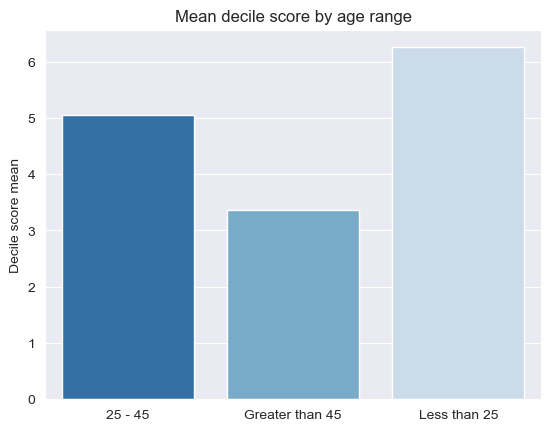

In [100]:
decile_mean_age = compas.groupby("age_cat")["decile_score"].mean().reset_index()
sns.barplot(data=decile_mean_age,x="age_cat",y="decile_score",palette="Blues_r")
plt.ylabel("Decile score mean")
plt.xlabel("")
plt.title("Mean decile score by age range")
# so only the graphic appears without any text referring to the object type.
plt.show(block=False)

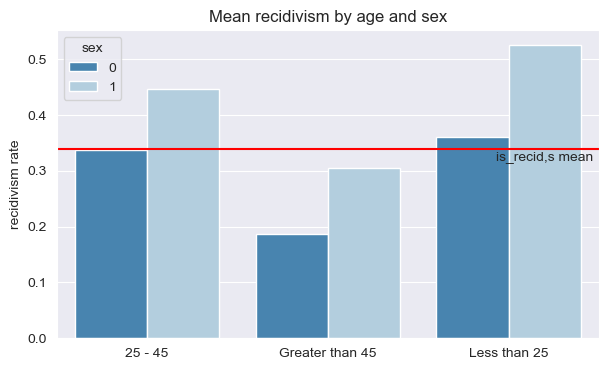

In [101]:
compas2 = compas.groupby(["sex","age_cat"])["is_recid"].mean().reset_index()

plt.figure(figsize=(7,4))


sns.barplot(x=compas2["age_cat"],y=compas2["is_recid"] ,hue=compas2["sex"].astype(str),palette="Blues_r")

plt.title("Mean recidivism by age and sex")
plt.xlabel("")
plt.ylabel("recidivism rate")
plt.axhline(y=0.34,color="red")
plt.text(x=1.93,y=0.32,s="is_recid,s mean")
# so only the graphic appears without any text referring to the object type.
plt.show(block=False)

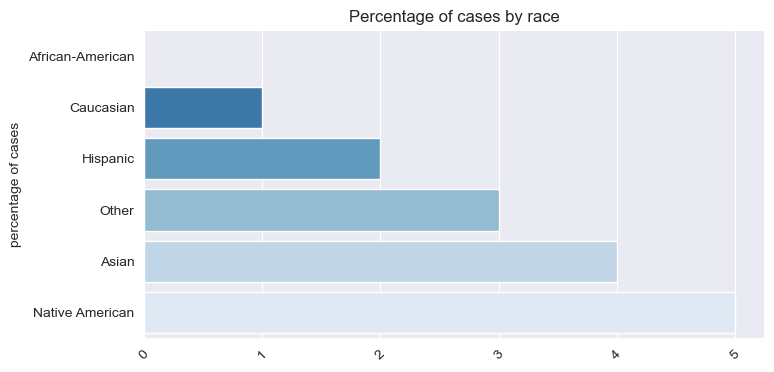

In [102]:
compas3 = compas["race"].value_counts(normalize=True,ascending=False).reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x=compas3.index,y=compas3["race"],palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("percentage of cases")
plt.title("Percentage of cases by race")
# so only the graphic appears without any text referring to the object type.
plt.show(block=False)

<function matplotlib.pyplot.show(close=None, block=None)>

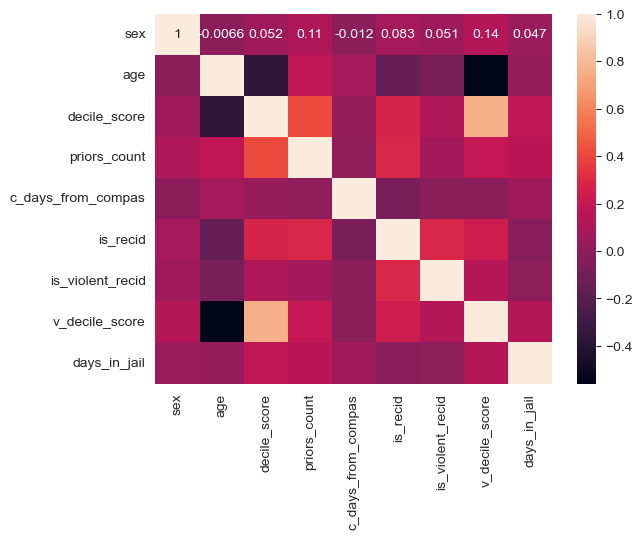

In [103]:
#get all numeric columns fro compass
compas_numeric = compas.select_dtypes(include=["int64","float64"])
#corr matrix
corr_matrix = compas_numeric.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show

**SPLITTING DATA**

In [104]:
X = compas[['days_in_jail', 'age', 'sex', 'decile_score', 'priors_count', 'c_days_from_compas', 'is_violent_recid', 'v_decile_score']]
y = compas['is_recid']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**TRAINING THE MODEL WITH SEX IN THE DATASET**

In [106]:
# Initialize the decision tree classifier
dtree = DecisionTreeClassifier()

# Fit the model to the training data
dtree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dtree.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
report = classification_report(y_test, y_pred)
print(f"Classification report:\n{report}")

Accuracy: 0.8649681528662421
Classification report:
              precision    recall  f1-score   support

          -1       0.97      0.99      0.98       225
           0       0.88      0.84      0.86      2714
           1       0.84      0.88      0.86      2556

    accuracy                           0.86      5495
   macro avg       0.90      0.90      0.90      5495
weighted avg       0.87      0.86      0.86      5495



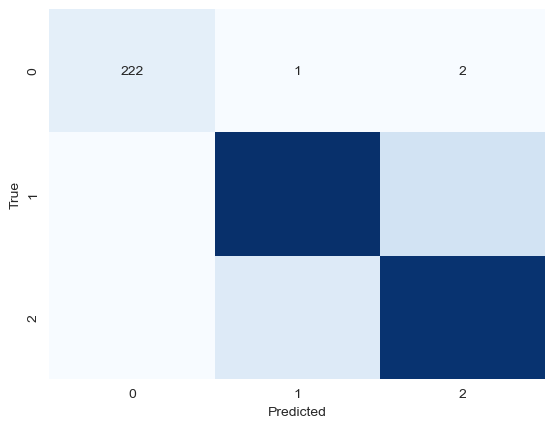

In [107]:
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**TRAINING THE MODEL GENDER UNAWARE**

In [108]:
X = compas[['days_in_jail', 'age', 'decile_score', 'priors_count', 'c_days_from_compas', 'is_violent_recid', 'v_decile_score']]
y = compas['is_recid']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [110]:
# Initialize the decision tree classifier
dtree = DecisionTreeClassifier()

# Fit the model to the training data
dtree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dtree.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
report = classification_report(y_test, y_pred)
print(f"Classification report:\n{report}")

Accuracy: 0.8616924476797089
Classification report:
              precision    recall  f1-score   support

          -1       0.97      0.99      0.98       225
           0       0.88      0.84      0.86      2714
           1       0.84      0.87      0.86      2556

    accuracy                           0.86      5495
   macro avg       0.89      0.90      0.90      5495
weighted avg       0.86      0.86      0.86      5495



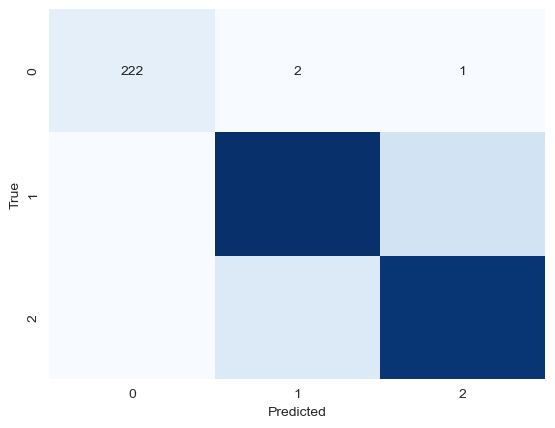

In [111]:
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**TRAINING THE MODEL FOR MALE AND FEMALE**

In [112]:
X = compas[['days_in_jail', 'sex', 'age', 'decile_score', 'priors_count', 'c_days_from_compas', 'is_violent_recid', 'v_decile_score']]
y = compas['is_recid']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [114]:
dtree = DecisionTreeClassifier()

# Fit the model to the training data
dtree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dtree.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
report = classification_report(y_test, y_pred)
print(f"Classification report:\n{report}")

Accuracy: 0.8646041856232939
Classification report:
              precision    recall  f1-score   support

          -1       0.97      0.99      0.98       225
           0       0.88      0.84      0.86      2714
           1       0.84      0.88      0.86      2556

    accuracy                           0.86      5495
   macro avg       0.90      0.90      0.90      5495
weighted avg       0.87      0.86      0.86      5495



In [115]:
PROTECTED = "sex"
MEN = 1.0 
WOMEN = 0.0 
men_indices = np.where(X_test[PROTECTED] == MEN)[0]
women_indices = np.where(X_test[PROTECTED] == WOMEN)[0]
print(men_indices, "No of Men =", men_indices.size)
print(women_indices, "No of Women =", women_indices.size)

[   0    1    2 ... 5491 5493 5494] No of Men = 4492
[   7   15   16 ... 5483 5490 5492] No of Women = 1003


In [116]:
Y_test_m = [y_test.values[i] for i in men_indices]
Y_test_f = [y_test.values[i] for i in women_indices]
print(Y_test_m)
print(Y_test_f)

[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, -1, 1, 0, 0, 1, 1, -1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, -1, 1, 0, 0, 0, -1, 1, 1, 1, 0, -1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, -1, 0, 1, 1, 1, 1, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, -1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, -1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, -1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, -1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,

In [117]:
Y_pred_m = [y_pred[i] for i in men_indices]
Y_pred_f = [y_pred[i] for i in women_indices]
print(Y_pred_m)
print(Y_pred_f)

[1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, -1, 1, 1, 0, 1, 0, -1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, -1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, -1, 1, 1, 0, 0, -1, 1, 1, 1, 0, -1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, -1, 0, 1, 1, 1, 1, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, -1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, -1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, -1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, -1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

**CM MALE**

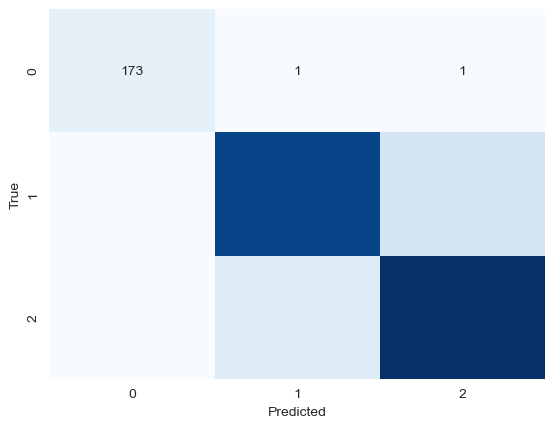

Classification report:
              precision    recall  f1-score   support

          -1       0.97      0.99      0.98       175
           0       0.88      0.84      0.86      2136
           1       0.85      0.89      0.87      2181

    accuracy                           0.87      4492
   macro avg       0.90      0.90      0.90      4492
weighted avg       0.87      0.87      0.87      4492



In [118]:
cm_m = confusion_matrix(Y_test_m, Y_pred_m)

# Visualize the confusion matrix using seaborn
sns.heatmap(cm_m, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# Print the classification report
report = classification_report(Y_test_m, Y_pred_m)
print(f"Classification report:\n{report}")

**CM FEMALE**

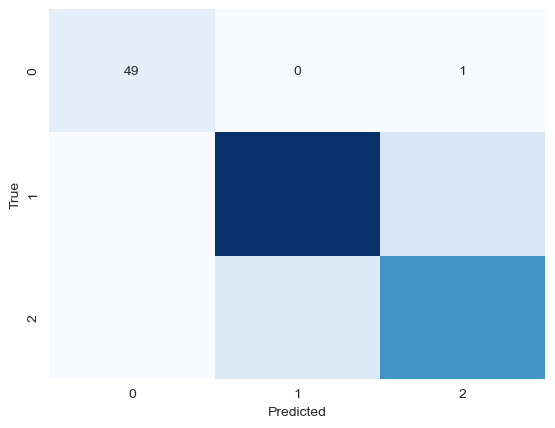

Classification report:
              precision    recall  f1-score   support

          -1       1.00      0.98      0.99        50
           0       0.88      0.86      0.87       578
           1       0.79      0.82      0.80       375

    accuracy                           0.85      1003
   macro avg       0.89      0.89      0.89      1003
weighted avg       0.85      0.85      0.85      1003



In [119]:
cm_fm = confusion_matrix(Y_test_f, Y_pred_f)

# Visualize the confusion matrix using seaborn
sns.heatmap(cm_fm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# Print the classification report
report = classification_report(Y_test_f, Y_pred_f)
print(f"Classification report:\n{report}")